Problem Statement


Air pollution is a severe challenge in urban areas, impacting public health and the environment. Accurately predicting air quality levels can help city officials take timely actions to reduce emissions or warn the public. Traditional methods of monitoring air quality are limited by the number of sensors and real-time reporting. AI models can fill these gaps by using available sensor data combined with weather and traffic information.

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("anuragbantu/new-delhi-air-quality")

print("Path to dataset files:", path)

c:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: C:\Users\Dell\.cache\kagglehub\datasets\anuragbantu\new-delhi-air-quality\versions\2


In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
df = pd.read_csv("NewDelhi_Air_quality.csv")
print(df.head())

   Unnamed: 0   AQI         CO       datetime       no2         o3       pm10  \
0           0  30.2  198.60268  2022-10-21:18  0.046857  55.789948  10.486722   
1           1  28.2  197.60132  2022-10-21:19  0.046456  54.931640  10.719325   
2           2  26.6  198.60268  2022-10-21:20  0.046857  54.645540  11.155578   
3           3  25.0  201.94054  2022-10-21:21  0.048196  55.074690  11.116206   
4           4  26.0  205.27840  2022-10-21:22  0.048865  55.789948  10.405250   

       pm25       so2      timestamp_local        timestamp_utc          ts  
0  5.637410  0.387430  2022-10-21T23:00:00  2022-10-21T18:00:00  1666375200  
1  4.618169  0.409782  2022-10-22T00:00:00  2022-10-21T19:00:00  1666378800  
2  3.520902  0.402331  2022-10-22T01:00:00  2022-10-21T20:00:00  1666382400  
3  2.225919  0.376254  2022-10-22T02:00:00  2022-10-21T21:00:00  1666386000  
4  1.979471  0.339001  2022-10-22T03:00:00  2022-10-21T22:00:00  1666389600  


In [3]:
print(df.describe())

       Unnamed: 0        AQI          CO        no2         o3       pm10  \
count    72.00000  72.000000   72.000000  72.000000  72.000000  72.000000   
mean     35.50000  26.180556  200.095443   0.041996  56.571762   9.115038   
std      20.92845   3.054650    4.515537   0.010940   6.431549   1.531785   
min       0.00000  19.000000  191.926960   0.015563  41.484833   6.686746   
25%      17.75000  25.000000  197.434427   0.037988  53.644180   7.864763   
50%      35.50000  27.000000  200.271600   0.045518  57.220460   8.914176   
75%      53.25000  28.000000  203.609470   0.050204  60.081482  10.274836   
max      71.00000  32.000000  208.616260   0.060914  68.664550  12.845977   

            pm25        so2            ts  
count  72.000000  72.000000  7.200000e+01  
mean    2.295406   0.363423  1.666503e+09  
std     0.656507   0.044664  7.534242e+04  
min     1.633373   0.283122  1.666375e+09  
25%     1.828729   0.320375  1.666439e+09  
50%     2.201811   0.372529  1.666503e+09 

In [4]:
# Check for missing values
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       72 non-null     int64  
 1   AQI              72 non-null     float64
 2   CO               72 non-null     float64
 3   datetime         72 non-null     object 
 4   no2              72 non-null     float64
 5   o3               72 non-null     float64
 6   pm10             72 non-null     float64
 7   pm25             72 non-null     float64
 8   so2              72 non-null     float64
 9   timestamp_local  72 non-null     object 
 10  timestamp_utc    72 non-null     object 
 11  ts               72 non-null     int64  
dtypes: float64(7), int64(2), object(3)
memory usage: 6.9+ KB
None


In [5]:
#checking for null or missing values
print(df.isnull().sum())

Unnamed: 0         0
AQI                0
CO                 0
datetime           0
no2                0
o3                 0
pm10               0
pm25               0
so2                0
timestamp_local    0
timestamp_utc      0
ts                 0
dtype: int64


In [6]:
#handling categorical data
data = pd.get_dummies(df, columns=["CO"])


In [7]:
print(df.columns)

Index(['Unnamed: 0', 'AQI', 'CO', 'datetime', 'no2', 'o3', 'pm10', 'pm25',
       'so2', 'timestamp_local', 'timestamp_utc', 'ts'],
      dtype='object')


In [8]:
# List of columns to be removed
columns_to_drop = ["Unnamed: 0", "datetime","timestamp_local","timestamp_utc", "ts"]
df = df.drop(columns_to_drop, axis=1, errors="ignore") #errors="ignore" will not raise an error if the column is not present
print(df.head())

    AQI         CO       no2         o3       pm10      pm25       so2
0  30.2  198.60268  0.046857  55.789948  10.486722  5.637410  0.387430
1  28.2  197.60132  0.046456  54.931640  10.719325  4.618169  0.409782
2  26.6  198.60268  0.046857  54.645540  11.155578  3.520902  0.402331
3  25.0  201.94054  0.048196  55.074690  11.116206  2.225919  0.376254
4  26.0  205.27840  0.048865  55.789948  10.405250  1.979471  0.339001


In [9]:
X = df.drop("AQI", axis=1)  # Replacing 'AQI' with the exact target column name
y = df["AQI"] # target column

In [10]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
print(X.head())

     CO       no2        o3      pm10      pm25       so2
0  0.40  0.690037  0.526316  0.616956  1.000000  0.608696
1  0.34  0.681181  0.494737  0.654721  0.745447  0.739130
2  0.40  0.690037  0.484211  0.725550  0.471407  0.695652
3  0.60  0.719557  0.500000  0.719158  0.147987  0.543478
4  0.80  0.734317  0.526316  0.603729  0.086437  0.326087


In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)
X_train.head()  

Training set size: (57, 6)
Testing set size: (15, 6)


,CO,no2,o3,pm10,pm25,so2
22,0.499999,0.822878,0.605263,0.412584,0.024820,0.217391
56,0.400000,0.660517,0.473684,0.329890,0.149012,0.695652
49,0.400000,0.645756,0.631579,0.219945,0.171552,0.673913
33,1.000000,0.881919,0.894737,0.317145,0.047264,0.217391
39,0.400000,0.180812,0.447368,0.023955,0.146346,0.478261


In [25]:
y_train.head()

22    27.0
56    25.0
49    27.0
33    30.0
39    25.0
Name: AQI, dtype: float64

In [26]:
#regression model
model = LinearRegression()

model.fit(X_train, y_train)

print("Model training completed.")


Model training completed.


In [27]:
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


Coefficients: [ 0.05084755  0.62753291 12.53274327 -0.64655344  5.49479931 -1.87506081]
Intercept: 19.04499251447102


In [28]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")


Mean Squared Error: 0.10681232269620358
R2 Score: 0.9877718216476138


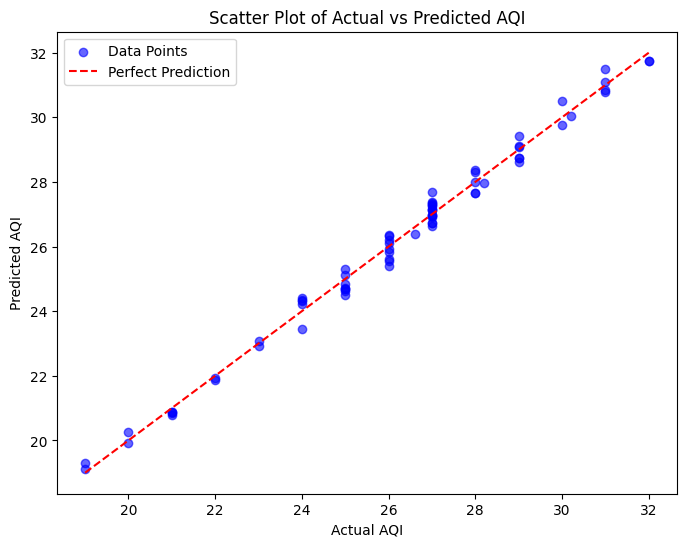

In [29]:
import matplotlib.pyplot as plt

actual_aqi = y  # actual AQI values
predicted_aqi = model.predict(X)  # Predicted AQI values

# scatter plot 
plt.figure(figsize=(8, 6))
plt.scatter(actual_aqi, predicted_aqi, alpha=0.6, color='blue', label='Data Points')
plt.plot([actual_aqi.min(), actual_aqi.max()], [actual_aqi.min(), actual_aqi.max()], 'r--', label='Perfect Prediction')
plt.xlabel('Actual AQI')
plt.ylabel('Predicted AQI')
plt.title('Scatter Plot of Actual vs Predicted AQI')
plt.legend()
plt.show()



In [35]:
import joblib

# Save the trained model
joblib.dump(model, "air_quality_index_prediction.pkl")


['air_quality_index_prediction.pkl']

In [41]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import joblib

# Load the trained model and scalers
model = joblib.load("air_quality_index_prediction.pkl")  # Adjust the path if needed

# # Function to convert ppb to ppm
# def ppb_to_ppm(value_in_ppb):
#     return value_in_ppb / 1000  # 1 ppm = 1000 ppb

scaler = MinMaxScaler()

# Function to get user input and predict AQI
def predict_aqi():
    print("Enter the following parameters:")
    pm10 = float(input("PM10 (e.g., µg/m³, enter as is): "))  # PM10 is typically given in µg/m³
    pm2_5 = float(input("PM2.5 (e.g., µg/m³, enter as is): "))  # PM2.5 is typically given in µg/m³
    no2 = float(input("NO2 : "))
    so2 = float(input("SO2 : "))
    co = float(input("CO : "))
    o3 = float(input("O3 : "))

    # Convert ppb inputs to ppm
    # no2 = ppb_to_ppm(no2_ppb)
    # so2 = ppb_to_ppm(so2_ppb)
    # co = ppb_to_ppm(co_ppb)
    # o3 = ppb_to_ppm(o3_ppb)

    # Create a raw input array
    raw_input = np.array([[pm10, pm2_5, no2, so2, co, o3]])
    print(raw_input)

    # Normalize the input using the scaler
    # normalized_input = scaler.fit_transform(raw_input)
    # print(normalized_input)

    # Predict the normalized AQI
    predicted_aqi = model.predict(raw_input)

    print("\nPrediction Results:")
    print(f"Predicted AQI: {predicted_aqi}")

# Call the function to predict AQI
predict_aqi()


Enter the following parameters:
[[0.41 0.02 0.82 0.21 0.49 0.6 ]]

Prediction Results:
Predicted AQI: [30.7868791]


c:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
